## Exploratory Data Analysis on Netflix dataset

In [30]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# importing dataset
df=pd.read_csv('netflix_titles.csv')

In [33]:
# dataset checking 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [36]:
df.shape

(8807, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data cleaning

In [44]:
# several null values are there column wise can replace

df['director'].fillna(value='unknown director',inplace= True)
df['cast'].fillna(value='unknown actor',inplace=True)
df['country'].fillna(value='unknown country',inplace=True)

# for date_added column  can remove the null values because while time series analysis will give error so can fill some date data otherwise can remove

df.dropna(inplace=True)

In [45]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [46]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# columns cast,director,country,genre are nested list so explode that list for better insights

## Data cleaning process

In [135]:
df_new=df.copy()

In [53]:
cast=df['cast'].apply(lambda x: str(x).split(','))
cast=list(cast)


In [54]:
director=df['director'].apply(lambda y : str(y).split(','))
director=list(director)

In [56]:
country=df['country'].apply(lambda z : str(z).split(','))
country=list(country)


In [57]:
listed_in=df['listed_in'].apply(lambda w : str(w).split(','))
listed_in=list(listed_in)

In [66]:
cast1=pd.DataFrame(cast,index=df['title'])

In [67]:
cast1=cast1.stack()

In [71]:
cast1=cast1.reset_index()

In [72]:
cast1

,title,level_1,0
0,Dick Johnson Is Dead,0,unknown actor
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64836,Zubaan,3,Manish Chaudhary
64837,Zubaan,4,Meghna Malik
64838,Zubaan,5,Malkeet Rauni
64839,Zubaan,6,Anita Shabdish


In [76]:
director1=pd.DataFrame(director,index=df['title']).stack().reset_index()

In [80]:
country1=pd.DataFrame(country,index=df['title']).stack().reset_index()

In [84]:
listed_in1=pd.DataFrame(listed_in,index=df['title']).stack().reset_index()

In [139]:
df_new['month_added']=pd.to_datetime(df['date_added']).dt.month_name()

In [140]:
df_new['day_added']=pd.to_datetime(df['date_added']).dt.day_name()

In [141]:
df_new['year_added']=pd.to_datetime(df['date_added']).dt.year

In [145]:
cast_df=df_new.merge(cast1,on='title')

In [148]:
director_df=df_new.merge(director1,on='title')

In [150]:
country_df=df_new.merge(country1,on='title')

In [152]:
genre_df=df_new.merge(listed_in1,on='title')

In [155]:
cast_df.rename(columns={0:'cast_new'},inplace=True)

In [157]:
cast_df.drop(columns='level_1',inplace=True)

In [160]:
cast_df['cast_new'].value_counts()

unknown actor             825
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Kim Ho-jung                1
 Ju Ji-hoon                 1
Kim Hye-soo                 1
 Annie Gonzalez             1
 Chittaranjan Tripathy      1
Name: cast_new, Length: 39249, dtype: int64

## Most famous actor Top 3 
 Anupam Kher     
 Rupa Bhimani              
 Takahiro Sakurai




In [172]:
director_df.drop(columns='level_1',inplace=True)

In [175]:
director_df.rename(columns={0:'director_new'},inplace=True)

In [176]:
director_df['director_new'].value_counts()

unknown director    2623
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Suhas Kadav           16
                    ... 
Eric Bross             1
Will Eisenberg         1
Marina Seresesky       1
Kenny Leon             1
Mozez Singh            1
Name: director_new, Length: 5119, dtype: int64

## Most famous Directors Top 3
1.Rajiv Chilaka  

 2.Jan Suter
 
 3.Raúl Campos

In [179]:
country_df.drop(columns='level_1',inplace=True)

In [181]:
country_df.rename(columns={0:'country_new'},inplace=True)

In [188]:
country_df['country_new'].value_counts()

United States      3202
India              1010
unknown country     831
United Kingdom      627
 United States      481
                   ... 
 Ecuador              1
Iran                  1
Cyprus                1
 Mongolia             1
 Montenegro           1
Name: country_new, Length: 198, dtype: int64

## United States and India released more movies and Tv shows on Netflix

In [191]:
genre_df.drop('level_1',axis=1,inplace=True)

In [194]:
genre_df.rename(columns={0:'genre_new'},inplace=True)

In [196]:
genre_df['genre_new'].value_counts()

 International Movies        2624
Dramas                       1601
Comedies                     1212
Action & Adventure            859
 Dramas                       829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: genre_new, Length: 73, dtype: int64

## Famous Genre are

International Movies        
Dramas                       
Comedies                     
Action & Adventure           
 Dramas



In [200]:
df_new['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

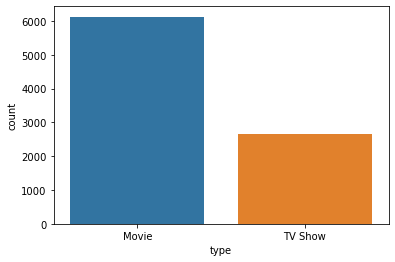

In [214]:
sns.countplot(data=df_new,x='type')
plt.show()

## More movies only released on netflix rather than Tv shows

Movie      6126

TV Show    2664

## Analysis using Timeframe

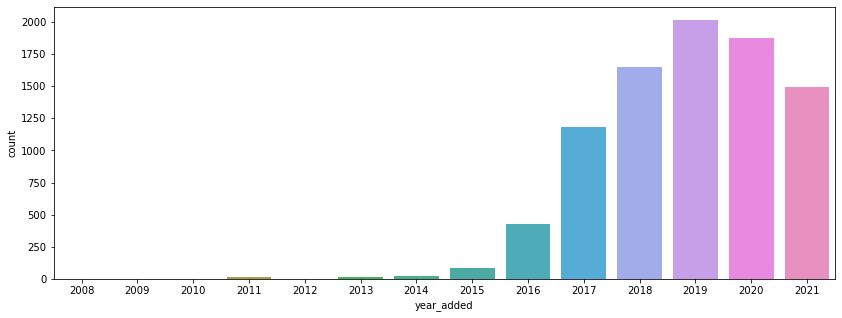

In [205]:
plt.figure(figsize=[14,5])

sns.countplot(data=df_new,x='year_added')
plt.show()

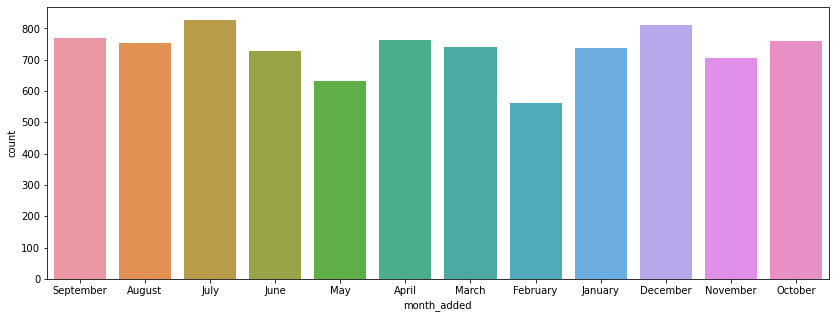

In [206]:
plt.figure(figsize=[14,5])

sns.countplot(data=df_new,x='month_added')
plt.show()

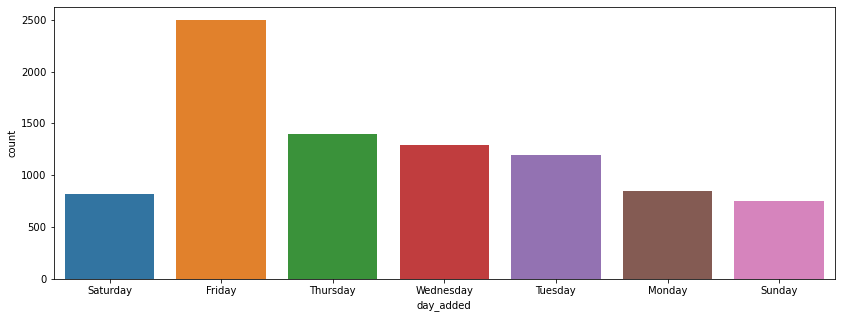

In [207]:
plt.figure(figsize=[14,5])

sns.countplot(data=df_new,x='day_added')
plt.show()

## Friday Released contents are high

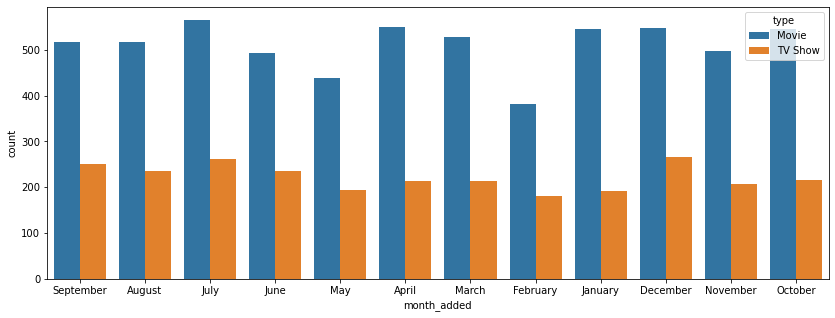

In [211]:
plt.figure(figsize=[14,5])

sns.countplot(data=df_new,x='month_added',hue='type')
plt.show()

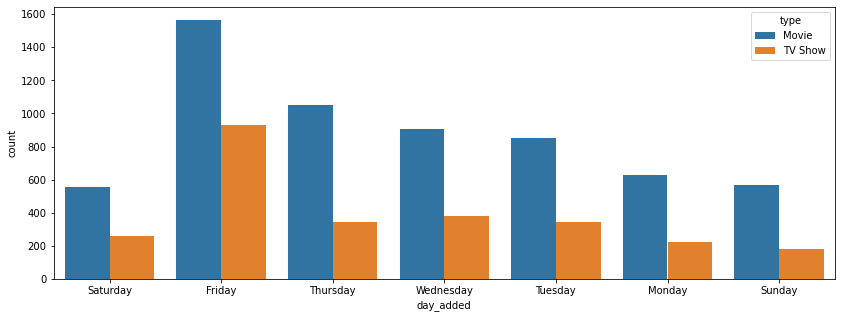

In [212]:
plt.figure(figsize=[14,5])

sns.countplot(data=df_new,x='day_added',hue='type')
plt.show()